In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import os

In [2]:
x = pd.read_csv('C:/Users/hp/Desktop/WORKING PROJECTS/fer2013.csv')
print (x.values.shape)

(35887, 3)


In [3]:
x.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
y = x.values[:,0]
pixels = x.values[:, 1]
print (type(pixels))
print (len(pixels))
print (len(pixels[0]))
print (pixels[10][10])

<class 'numpy.ndarray'>
35887
8287
3


In [5]:
p = pixels[10].split(' ')
print(len(p))

2304


In [6]:
X = np.zeros((pixels.shape[0], 48*48))

for ix in range(X.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])

In [7]:
temp = X

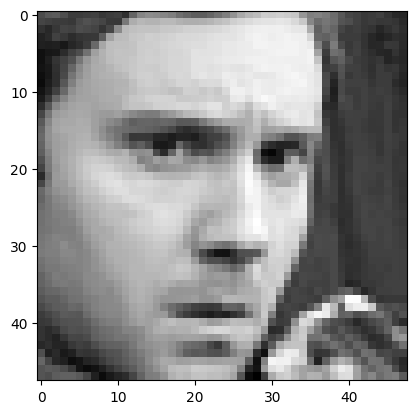

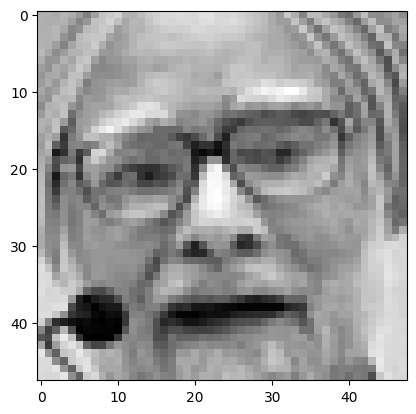

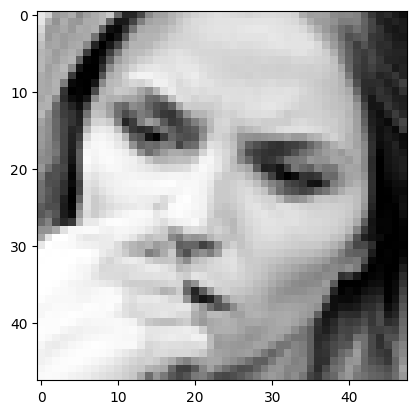

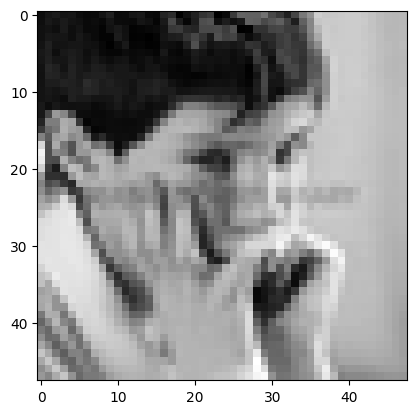

In [8]:
for ix in range(4):
    plt.figure(ix)
    plt.imshow(temp[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [9]:
X

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [10]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=object)

In [11]:
X=X/255

In [12]:
X

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.41568627, 0.42745098,
        0.32156863],
       [0.59215686, 0.58823529, 0.57647059, ..., 0.75686275, 0.71764706,
        0.72156863],
       [0.90588235, 0.83137255, 0.61176471, ..., 0.34509804, 0.43137255,
        0.59607843],
       ...,
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.60392157, 0.52156863,
        0.44313725],
       [0.11764706, 0.10980392, 0.10980392, ..., 0.1372549 , 0.11764706,
        0.10980392],
       [0.0745098 , 0.05098039, 0.05490196, ..., 0.74117647, 0.78039216,
        0.78823529]])

In [13]:
X_train = X[0:30000, :]
Y_train = y[0:30000]
print (X_train.shape, Y_train.shape)

X_test = X[30000:32300,:]
Y_test = y[30000:32300]
print (X_test.shape, Y_test.shape)

(30000, 2304) (30000,)
(2300, 2304) (2300,)


In [14]:
X_train = X_train.reshape((X_train.shape[0], 48, 48,1 ))
X_test  = X_test.reshape((X_test.shape[0], 48, 48,1))

In [15]:
Y_train = to_categorical(Y_train)
Y_test  = to_categorical(Y_test)
print(Y_train.shape)
print(Y_test.shape)

(30000, 7)
(2300, 7)


In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [18]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.22))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam' ,
              metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7) ,
              metrics=['acc'])

In [20]:
epochs = 16
batch_size = 64

history = model.fit(X_train, Y_train, 
                    batch_size=batch_size,
                    validation_data=(X_test, Y_test),
                    epochs = epochs,
                    shuffle=True, 
                    verbose = 2)

Epoch 1/16
469/469 - 436s - loss: 1.8116 - acc: 0.2514 - val_loss: 1.6888 - val_acc: 0.3287 - 436s/epoch - 929ms/step
Epoch 2/16
469/469 - 441s - loss: 1.6050 - acc: 0.3634 - val_loss: 1.4107 - val_acc: 0.4652 - 441s/epoch - 939ms/step
Epoch 3/16
469/469 - 450s - loss: 1.4360 - acc: 0.4419 - val_loss: 1.2990 - val_acc: 0.5035 - 450s/epoch - 959ms/step
Epoch 4/16
469/469 - 474s - loss: 1.3399 - acc: 0.4821 - val_loss: 1.2205 - val_acc: 0.5243 - 474s/epoch - 1s/step
Epoch 5/16
469/469 - 466s - loss: 1.2748 - acc: 0.5122 - val_loss: 1.1881 - val_acc: 0.5409 - 466s/epoch - 993ms/step
Epoch 6/16
469/469 - 481s - loss: 1.2321 - acc: 0.5293 - val_loss: 1.1466 - val_acc: 0.5557 - 481s/epoch - 1s/step
Epoch 7/16
469/469 - 493s - loss: 1.1949 - acc: 0.5458 - val_loss: 1.1533 - val_acc: 0.5604 - 493s/epoch - 1s/step
Epoch 8/16
469/469 - 554s - loss: 1.1561 - acc: 0.5594 - val_loss: 1.1424 - val_acc: 0.5513 - 554s/epoch - 1s/step
Epoch 9/16
469/469 - 494s - loss: 1.1336 - acc: 0.5725 - val_loss: 1

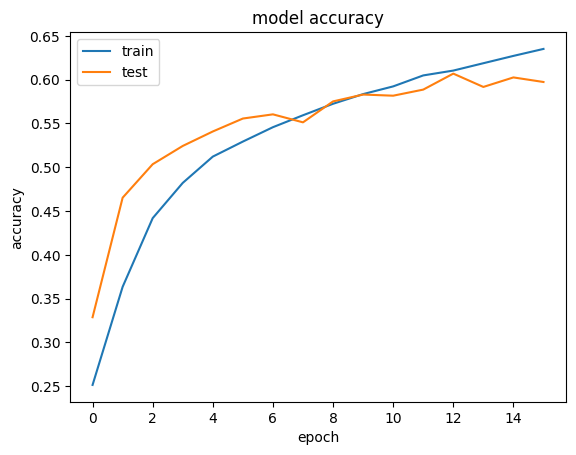

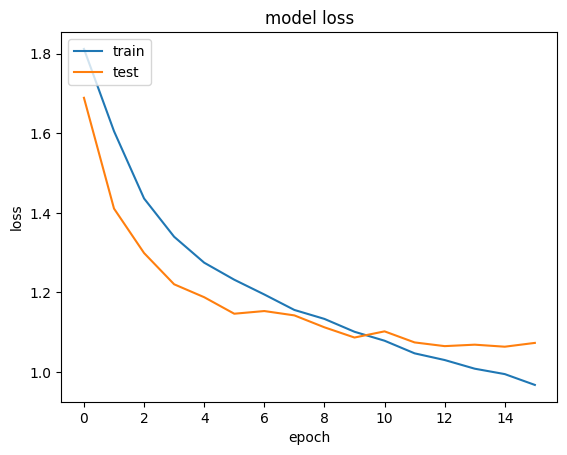

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
model.save('emotion_detection_model.h5')

In [1]:
pip show tensorflow

Name: tensorflow
Version: 2.11.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\hp\anaconda3\envs\tensorflow\lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.
